In [6]:
pip install yellowbrick

SyntaxError: invalid syntax (<ipython-input-6-103653bdc914>, line 2)

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import calinski_harabasz_score, adjusted_rand_score
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from yellowbrick.cluster import KElbowVisualizer

In [40]:
df = pd.read_csv('F:\Spark_Files\Customer_data.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
clusterdata = df.iloc[:,[3,4]].values

# Checking data distribution using MatplotLib

No handles with labels found to put in legend.


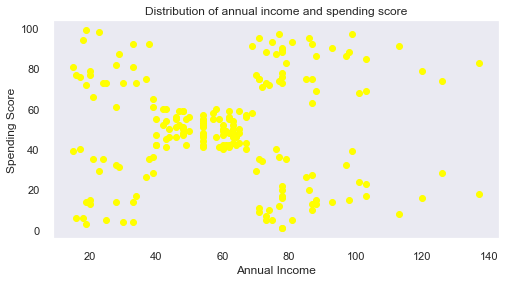

In [29]:
plt.figure(figsize = (8,4))
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'], color = 'yellow')
plt.title("Distribution of annual income and spending score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend(loc = 'best')
plt.show()

In [52]:
ss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(clusterdata)
    ss.append(kmeans.inertia_)


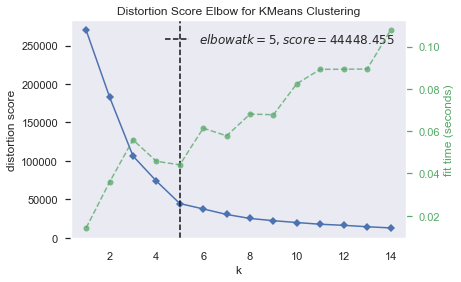

In [53]:
model = KMeans()
elbow = KElbowVisualizer(model, k = (1,15), timing = False)
elbow.fit(clusterdata)
elbow.show()

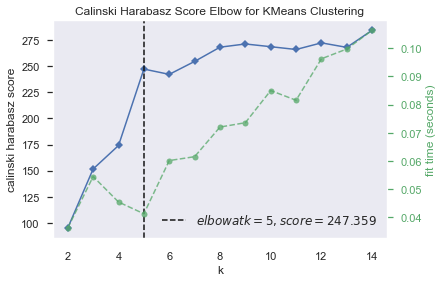

In [54]:
model = KMeans()
elbow = KElbowVisualizer(model, k = (2,15), metric = 'calinski_harabasz', timing = False)
elbow.fit(clusterdata)
elbow.show()

In [45]:
model = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
clusters = model.fit_predict(X)

# Plotting clusters using Seaborn

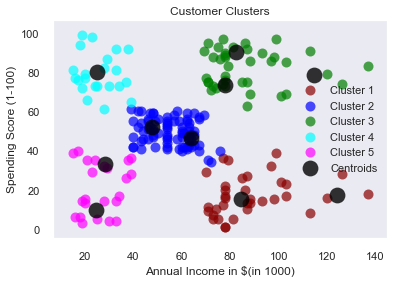

In [79]:
sns.set(style = "dark")
sns.regplot(x = clusterdata[clusters == 0, 0], y = clusterdata[clusters == 0, 1], fit_reg=False, scatter_kws={"color":"darkred", "alpha": 0.7, "s":100}, label = "Cluster 1")
sns.regplot(x = clusterdata[clusters == 1, 0], y = clusterdata[clusters == 1, 1], fit_reg=False, scatter_kws={"color":"blue", "alpha":0.7, "s":100}, label = "Cluster 2" )
sns.regplot(x = clusterdata[clusters == 2, 0], y = clusterdata[clusters == 2, 1], fit_reg=False, scatter_kws={"color":"green", "alpha":0.7, "s":100}, label = "Cluster 3" )
sns.regplot(x = clusterdata[clusters == 3, 0], y = clusterdata[clusters == 3, 1], fit_reg=False, scatter_kws={"color":"cyan", "alpha":0.7, "s":100}, label = "Cluster 4" )
sns.regplot(x = clusterdata[clusters == 4, 0], y = clusterdata[clusters == 4, 1], fit_reg=False, scatter_kws={"color":"magenta", "alpha":0.7, "s":100}, label = "Cluster 5" )
sns.regplot(x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1], label = "Centroids", fit_reg=False, scatter_kws={"color":"black","s":250})

plt.title('Customer Clusters')
plt.xlabel('Annual Income in $(in 1000)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc = "best"); #best, upper right ,upper left,lower left,lower right,right,center left,center right,lower center,upper center,center 
